# Task 2 - To Explore Unsupervised Machine Learning

Task statement:  
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

**Author: Atul Gopinathan**  
**E-mail: atulgopinathan@gmail.com**

In [139]:
#### IMPORTS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### Creating dataframe and exploring it

In [140]:
data = pd.read_csv('Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [141]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [142]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 
x = data[columns]
le = LabelEncoder()
y = le.fit_transform(data['Species'])

### Initial Visualization:
We will visualize the chart for the first two columns:

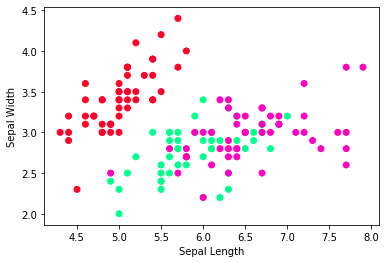

In [143]:
plt.scatter(x[columns[0]], x[columns[1]], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### Creating model and determining the right number of clusters:

In [144]:
sum_squared_dist = []

for i in range(1, 10):
    model = KMeans(n_clusters=i)
    model.fit(x)
    sum_squared_dist.append(model.inertia_)

### Determining the best K value using Elbow Method:

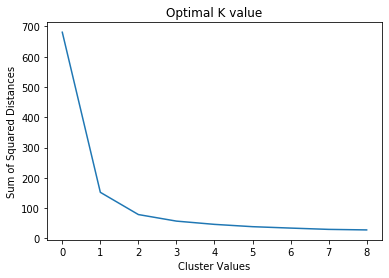

In [145]:
plt.plot(sum_squared_dist)
plt.title('Optimal K value')
plt.xlabel('Cluster Values')
plt.ylabel("Sum of Squared Distances")
plt.show()

From this we can infer that the optimal number of cluster value is 3 as the elbow occurs near 3. Beyond that the Sum of Squared distances become to low while it is too high when the number is less than 3.

In [146]:
model = KMeans(n_clusters = 3)
y_pred = model.fit_predict(x)
centers = model.cluster_centers_

### Visualizing the predicted data:

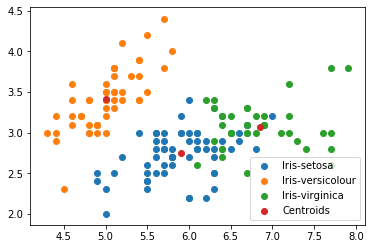

In [147]:
x = x.to_numpy()
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], label = 'Iris-virginica')
plt.scatter(centers[:, 0], centers[:,1], label = 'Centroids')
plt.legend()
plt.show()

### Thank You!